In [112]:
%matplotlib inline

In [113]:
import pandas as pd

In [114]:
from datetime import datetime as d

In [115]:
df = pd.DataFrame({
        'first_name': ['Aleksandra', 'Tomek', 'Konrad', 'Katarzyna', 'Jan', 'Tomek'],
        'last_name': ['Nowak', 'Kowalski', 'Lewandowski', 'Woźniak', 'Wiśniewska', 'Błaszczykowski'],
        'gender': ['female', 'male', 'male', 'female', 'male', 'male'],
        'date_of_birth': [d(1988, 1, 10), d(1938, 10, 22), d(1986, 11, 20), 
                          d(1980, 2, 12), d(1978, 5, 21), d(1960, 3, 1)],
        'rate': [100, 90, 50, 110, 170, 40],
        'hours': [60, 20, 100, 50, 160, 70],
    },
    columns=('first_name', 'last_name', 'gender', 'date_of_birth', 'rate', 'hours'),
)

In [116]:
df

,first_name,last_name,gender,date_of_birth,rate,hours
0,Aleksandra,Nowak,female,1988-01-10,100,60
1,Tomek,Kowalski,male,1938-10-22,90,20
2,Konrad,Lewandowski,male,1986-11-20,50,100
3,Katarzyna,Woźniak,female,1980-02-12,110,50
4,Jan,Wiśniewska,male,1978-05-21,170,160
5,Tomek,Błaszczykowski,male,1960-03-01,40,70


In [117]:
df[df.gender == 'male']

,first_name,last_name,gender,date_of_birth,rate,hours
1,Tomek,Kowalski,male,1938-10-22,90,20
2,Konrad,Lewandowski,male,1986-11-20,50,100
4,Jan,Wiśniewska,male,1978-05-21,170,160
5,Tomek,Błaszczykowski,male,1960-03-01,40,70


In [118]:
df[(df.gender == 'male') & (df.date_of_birth.dt.year > 1970)]

,first_name,last_name,gender,date_of_birth,rate,hours
2,Konrad,Lewandowski,male,1986-11-20,50,100
4,Jan,Wiśniewska,male,1978-05-21,170,160


In [119]:
df['per_month'] = df.rate * df.hours

In [120]:
df.sort_values('per_month', ascending=False)

,first_name,last_name,gender,date_of_birth,rate,hours,per_month
4,Jan,Wiśniewska,male,1978-05-21,170,160,27200
0,Aleksandra,Nowak,female,1988-01-10,100,60,6000
3,Katarzyna,Woźniak,female,1980-02-12,110,50,5500
2,Konrad,Lewandowski,male,1986-11-20,50,100,5000
5,Tomek,Błaszczykowski,male,1960-03-01,40,70,2800
1,Tomek,Kowalski,male,1938-10-22,90,20,1800


In [121]:
df.rate.sum() / df.rate.count()

93.333333333333329

In [122]:
rate_stats = df.groupby('gender').aggregate({'rate': sum, 'gender': 'count'})

In [123]:
rate_stats

,rate,gender
gender,,
female,210,2
male,350,4


In [124]:
rate_for_gender = rate_stats.rate / rate_stats.gender

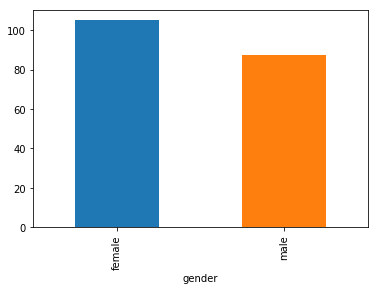

In [125]:
rate_for_gender.plot(kind='bar')

In [163]:
def rate_level(rate):
    if rate < 60:
        return '1: <60'
    elif 60 <= rate < 120:
        return '2: 60-120'
    else:
        return '3: >120'

In [164]:
df['rate_level'] = df.rate.apply(rate_level)

In [133]:
df

,first_name,last_name,gender,date_of_birth,rate,hours,per_month,rate_level
0,Aleksandra,Nowak,female,1988-01-10,100,60,6000,2: 60-120
1,Tomek,Kowalski,male,1938-10-22,90,20,1800,2: 60-120
2,Konrad,Lewandowski,male,1986-11-20,50,100,5000,1: <60
3,Katarzyna,Woźniak,female,1980-02-12,110,50,5500,2: 60-120
4,Jan,Wiśniewska,male,1978-05-21,170,160,27200,3: >120
5,Tomek,Błaszczykowski,male,1960-03-01,40,70,2800,1: <60


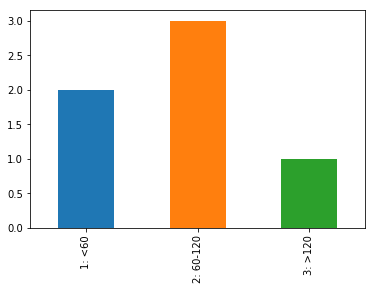

In [165]:
df.rate_level.value_counts().sort_index().plot(kind='bar')

In [161]:
df.per_month < 5000

0    False
1     True
2    False
3    False
4    False
5     True
Name: per_month, dtype: bool